In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [11]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    X_train, y_train_oh,
    epochs=20,
    validation_split=0.3,
    verbose=2
)

Epoch 1/20
1313/1313 - 28s - 21ms/step - accuracy: 0.9472 - loss: 0.1775 - val_accuracy: 0.9758 - val_loss: 0.0809
Epoch 2/20
1313/1313 - 47s - 36ms/step - accuracy: 0.9829 - loss: 0.0584 - val_accuracy: 0.9752 - val_loss: 0.0846
Epoch 3/20
1313/1313 - 31s - 23ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9818 - val_loss: 0.0595
Epoch 4/20
1313/1313 - 43s - 33ms/step - accuracy: 0.9922 - loss: 0.0253 - val_accuracy: 0.9786 - val_loss: 0.0745
Epoch 5/20
1313/1313 - 32s - 24ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9813 - val_loss: 0.0698
Epoch 6/20
1313/1313 - 37s - 28ms/step - accuracy: 0.9958 - loss: 0.0127 - val_accuracy: 0.9832 - val_loss: 0.0627
Epoch 7/20
1313/1313 - 41s - 32ms/step - accuracy: 0.9968 - loss: 0.0093 - val_accuracy: 0.9845 - val_loss: 0.0656
Epoch 8/20
1313/1313 - 39s - 30ms/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 0.9847 - val_loss: 0.0735
Epoch 9/20
1313/1313 - 40s - 30ms/step - accuracy: 0.9976 - loss: 0.0069 - val_a

In [20]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [21]:
y_pred = y_prob.argmax(axis=1)

In [22]:
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9868


In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



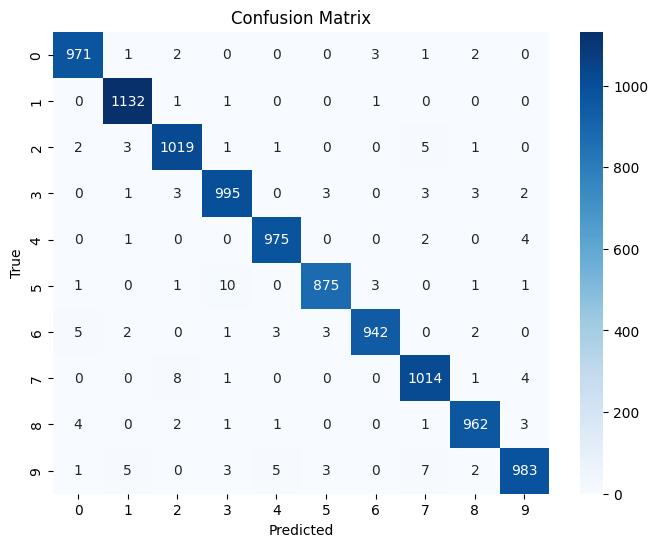

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

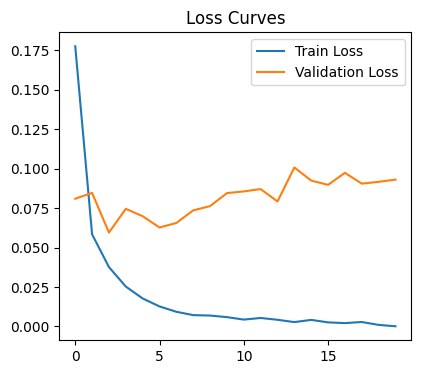

In [25]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curves")
plt.legend()

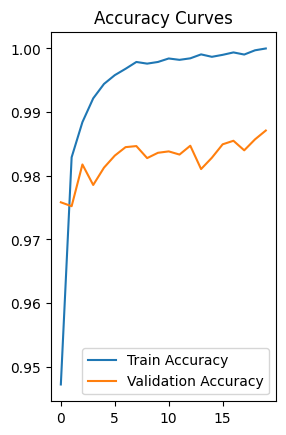

In [26]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curves")
plt.legend()
plt.show()

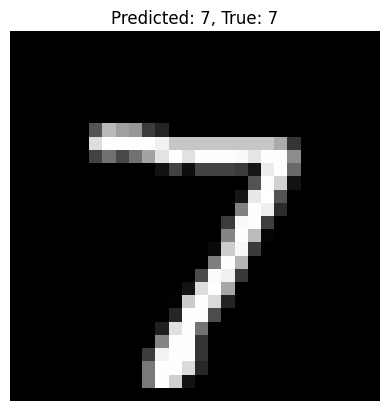

In [27]:
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted: {y_pred[0]}, True: {y_test[0]}")
plt.axis('off')
plt.show()

In [28]:
single_pred = model.predict(X_test[0].reshape(1, 28, 28))
print(f"Model prediction for first test sample: {single_pred.argmax()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Model prediction for first test sample: 7
